In [11]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns

In [12]:
r25_path = "..//data//route25_potential_and_real_stops.csv"
ridership = "..//data//Stop_Riders_Ranking_by_Route_Daily_Totals_May_2019.csv"

In [13]:
r25_stop_ids = pd.read_csv(r25_path, usecols=['Est_TotPop_Density','CorrespondingStopID', 'Transfer'])
r25_stop_ids.dropna(inplace=True)

In [14]:
ridership_data = pd.read_csv(ridership, usecols=['UNIQUE_STOP_NUMBER', 'TOTAL', 'IndividRoute'])

In [15]:
ridership_data = ridership_data[ridership_data['IndividRoute'] == 25]
ridership_data.rename(columns={'UNIQUE_STOP_NUMBER' : 'CorrespondingStopID'}, inplace=True)

In [16]:
final_data = pd.merge(r25_stop_ids, ridership_data, on='CorrespondingStopID', how='inner')
final_data['TOTAL'] = final_data['TOTAL'].astype(int)

In [17]:
final_data
non_transfer = final_data[final_data['Transfer'] == 'No']

In [18]:
non_transfer

,Est_TotPop_Density,Transfer,CorrespondingStopID,TOTAL,IndividRoute
4,3116.89,No,1796.0,4,25
5,2673.80,No,1797.0,7,25
6,2556.67,No,3808.0,6,25
7,2098.30,No,3645.0,3,25
8,1395.47,No,229.0,14,25
9,1578.82,No,2114.0,22,25
10,2032.09,No,194.0,40,25
11,2276.55,No,1887.0,3,25
12,1792.72,No,1888.0,1,25
13,1711.23,No,1889.0,1,25


[Text(0, 0.5, 'Total Ridership by Stop'), Text(0.5, 0, 'Population Density')]

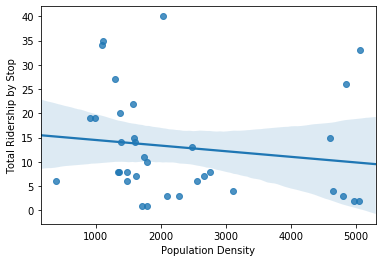

In [19]:
plt = sns.regplot(x=non_transfer['Est_TotPop_Density'], y=non_transfer['TOTAL'])
plt.set(xlabel='Population Density', ylabel='Total Ridership by Stop')

[Text(0, 0.5, 'Total Ridership by Stop'), Text(0.5, 0, 'Population Density')]

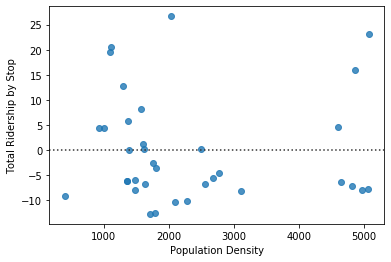

In [22]:
vice_plt = sns.residplot(x=non_transfer['Est_TotPop_Density'], y=non_transfer['TOTAL'])
vice_plt.set(xlabel='Population Density', ylabel='Total Ridership by Stop')

In [21]:
fig = plt.get_figure()
fig.savefig('..//plots//linear_pop_v_util_no_transfer.png')